In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
proj_dir = '/content/drive/MyDrive/spiegel'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel(proj_dir+'/get.xlsx')
print(data)

                     IP                Time                        Path  \
0           13.66.139.0 2020-12-19 13:57:00                  /index.php   
1        216.244.66.230 2020-12-19 14:14:00                 /robots.txt   
2          54.36.148.92 2020-12-19 14:16:00                  /index.php   
3         92.101.35.224 2020-12-19 14:29:00    /administrator/index.php   
4         54.36.148.108 2020-12-19 15:09:00                 /robots.txt   
...                 ...                 ...                         ...   
230808  128.199.122.170 2022-03-22 19:28:00  /blog/ALFA_DATA/alfacgiapi   
230809     89.38.225.39 2022-03-22 19:38:00                 /robots.txt   
230810       3.72.4.227 2022-03-22 20:13:00                 /robots.txt   
230811       3.72.4.227 2022-03-22 20:13:00                           /   
230812     207.46.13.77 2022-03-22 20:36:00                           /   

       Response  
0           200  
1           200  
2           200  
3           200  
4        

In [ ]:
data['Time'] = data['Time'].dt.floor('h')
timeseries = data.set_index('Time')
print(timeseries)
# for i in timeseries:


                                  IP                        Path Response
Time                                                                     
2020-12-19 13:00:00      13.66.139.0                  /index.php      200
2020-12-19 14:00:00   216.244.66.230                 /robots.txt      200
2020-12-19 14:00:00     54.36.148.92                  /index.php      200
2020-12-19 14:00:00    92.101.35.224    /administrator/index.php      200
2020-12-19 15:00:00    54.36.148.108                 /robots.txt      200
...                              ...                         ...      ...
2022-03-22 19:00:00  128.199.122.170  /blog/ALFA_DATA/alfacgiapi      404
2022-03-22 19:00:00     89.38.225.39                 /robots.txt      200
2022-03-22 20:00:00       3.72.4.227                 /robots.txt      200
2022-03-22 20:00:00       3.72.4.227                           /      200
2022-03-22 20:00:00     207.46.13.77                           /      200

[230813 rows x 3 columns]


In [ ]:
H = 10634                          # total hours of data we have
pages = pd.read_csv(proj_dir+'/pages.csv')
valid_page = pages['PATH']
print(valid_page)

0                                 /index.php
1                                          /
2                   /administrator/index.php
3                                /robots.txt
4               /media/system/js/mootools.js
                       ...                  
565                          /stories/raith/
566                        /index.php/admin/
567      /components/com_user/controller.php
568    /components/com_user/models/reset.php
569                                /htaccess
Name: PATH, Length: 570, dtype: object


In [ ]:

pages = pd.read_csv(proj_dir+'/pages.csv')
valid_page = pages['PATH']
quantile1 = list(valid_page[0:114])
quantile2 = list(valid_page[114:228])
quantile3 = list(valid_page[228:342])
quantile4 = list(valid_page[342:456])
quantile5 = list(valid_page[456:570])
#print(quantile1)
##print(quantile2)
#print(quantile3)
#print(quantile4)
#print(quantile5)

# timeseries.loc["2020-12-19 14:00:00"]


In [ ]:
valid_page_checker = set(valid_page)
N = len(pages)                      # N is the total pages on the website
                                    # These are all the pages which are services with 200 HTML status code
M = int(5)
no_of_quantiles = int(N/M)
# print(N)>570 pages total
#  fij represent the total number of requests on ith page (1 ≤ i ≤ N) in the jth hour.


In [ ]:
# U is the quantiles 
# timeseries.index[i]
time=set()
for i in range(len(timeseries)):
  time.add(timeseries.index[i])
time = list(sorted(time))
# print(time)
# U = [[0 for i in range(M)] for j in range(int(no_of_quantiles))]
# for i in range(int(no_of_quantiles)):
#   for j in range(M):
#     U[i][j]


In [ ]:
S = [[0 for i in range(int(H))] for j in range(int(M))]

In [ ]:
for i in range(H):
  requests = timeseries.loc[time[i]]
  no_of_req = int(len(requests))
  request_path = requests['Path']
  request_response = requests['Response']
  if not isinstance(requests, pd.DataFrame):
    if request_response == 200:
        if request_path in quantile1:
          S[0][i]+=1
        elif request_path in quantile2:
          S[1][i]+=1
        elif request_path in quantile3:
          S[2][i]+=1
        elif request_path in quantile4:
          S[3][i]+=1
        elif request_path in quantile5:
          S[4][i]+=1
  else:
    for j in range(no_of_req):
      if request_response[j] == 200:
        if request_path[j] in quantile1:
          S[0][i]+=1
        elif request_path[j] in quantile2:
          S[1][i]+=1
        elif request_path[j] in quantile3:
          S[2][i]+=1
        elif request_path[j] in quantile4:
          S[3][i]+=1
        elif request_path[j] in quantile5:
          S[4][i]+=1
# request = timeseries.loc[time[1000]]
# len(request)

Text(0, 0.5, 'No of requests')

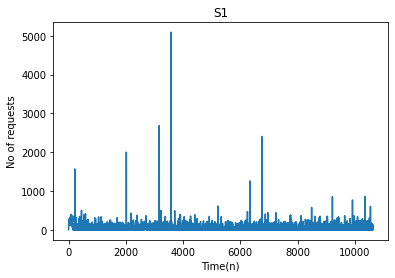

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[0])
plt.title("S1")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

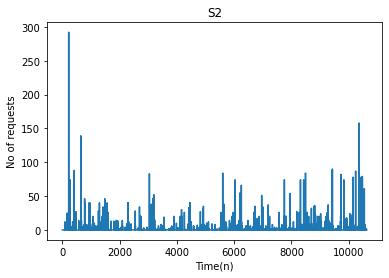

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[1])
plt.title("S2")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

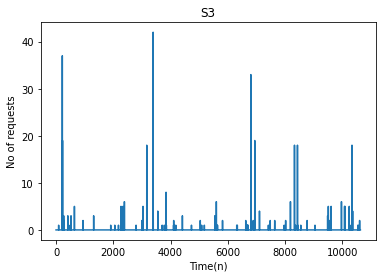

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[2])
plt.title("S3")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

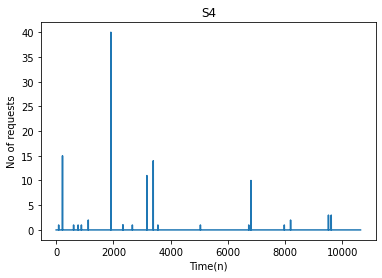

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[3])
plt.title("S4")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")

Text(0, 0.5, 'No of requests')

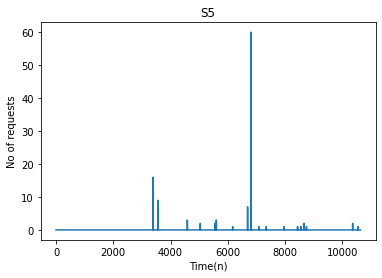

In [ ]:
x = np.arange(0, H, 1)
plt.plot(x,S[4])
plt.title("S5")
plt.xlabel("Time(n)")
plt.ylabel("No of requests")